# PIC-SURE API Biomedical Informatics Systems Analyst Code Test

## Introduction

A key component to this role is to help our team develop ways to enable research without exporting the data and to help users(mostly researchers) to use those functions of the API to perform research tasks. These problems are designed to test your proficiency in Python and your ability to think creatively about solving a problem in a new way.

We will start with an introduction to the PIC-SURE API and introduce all of the basic operations that should be required to answer the code test.

At any point if you wish to try things out, or to answer the code test challenges when you get to them, these JupyterHub features will be useful:

This button in the toolbar above allows you to add a new cell after the selected cell : 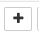

This dropdown in the toolbar above allows you to change the type of the selected cell : 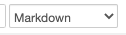

### Because this is a code test and should not take you a long time to complete, we are not judging you on scientific or statistical rigor. The code test will be graded based on how you use the API to answer the challenge problems at the end of the notebook.

## PIC-SURE python API 
### What is PIC-SURE? 

<!--img src="./img/PIC-SURE_logo.png" width= "360px"> -->

As part of the BioData Catalyst initiative, the Patient Information Commons Standard Unification of Research Elements (PIC-SURE) platform has been integrating clinical and genomic datasets from multiple TOPMed and TOPMed related studies funded by the National Heart Lung and Blood Institute (NHLBI). 

### PIC-SURE Client Libraries
Two sets of client libraries are avaialable for the PIC-SURE API, python and R, helping investigators to query the datasets using either of those languages.

PIC-SURE is a larger project from which the R/python PIC-SURE API is only a single component. Among other things, PIC-SURE also offers a graphical user interface that allows researchers to explore variables across multiple studies, filter patient that match criteria, and create cohort from this interactive exploration.

The python API is actively developed by the Avillach-Lab at Harvard Medical School.

PIC-SURE API GitHub repo:
* https://github.com/hms-dbmi/pic-sure-python-adapter-hpds
* https://github.com/hms-dbmi/pic-sure-python-client



 -------   

### Packages installation

Installation of the packages listed in the `requirements.txt` file, as well as the two components of the PIC-SURE API from GitHub, that is the PIC-SURE adapter and the PIC-SURE Client.

In [1]:
%%bash
pwd
cat requirements.txt

/home/drew/Downloads/PIC-SURE/work
numpy==1.16.4
matplotlib>=3.1.1
pandas>=0.25.3
scipy>=1.3.1
tqdm>=4.38.0
statsmodels>=0.10.2


In [2]:
!python3 -m pip install --upgrade pip
!{sys.executable} -m pip install --upgrade --force-reinstall git+https://github.com/hms-dbmi/pic-sure-python-adapter-hpds.git
!{sys.executable} -m pip install --upgrade --force-reinstall git+https://github.com/hms-dbmi/pic-sure-python-client.git

/bin/sh: 1: {sys.executable}: not found
/bin/sh: 1: {sys.executable}: not found


In [3]:
import sys
sys.path

['/home/drew/Downloads/PIC-SURE/work',
 '/usr/lib/python38.zip',
 '/usr/lib/python3.8',
 '/usr/lib/python3.8/lib-dynload',
 '',
 '/home/drew/.local/lib/python3.8/site-packages',
 '/usr/local/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.8/dist-packages',
 '/usr/lib/python3/dist-packages/IPython/extensions',
 '/home/drew/.ipython']

In [5]:
import sys
sys.path
!{sys.executable} -m pip install --upgrade --force-reinstall git+https://github.com/hms-dbmi/pic-sure-python-adapter-hpds.git
!{sys.executable} -m pip install --upgrade --force-reinstall git+https://github.com/hms-dbmi/pic-sure-python-client.git

  Cloning https://github.com/hms-dbmi/pic-sure-python-adapter-hpds.git to /tmp/pip-req-build-la3_p5zz
  Using cached httplib2-0.18.1-py3-none-any.whl (95 kB)
  Created wheel for PicSureHpdsLib: filename=PicSureHpdsLib-0.9.0-py2.py3-none-any.whl size=21879 sha256=4ee51010ff3d153979eaa3addf6f1f9d034504e92dd3a346f4c9a7a978ef0cd1
  Stored in directory: /tmp/pip-ephem-wheel-cache-l177v297/wheels/e8/35/43/484d5d574661fc4a2c5b083551bc3c7254695764ed17ce397e
Successfully built PicSureHpdsLib
  Attempting uninstall: httplib2
    Found existing installation: httplib2 0.18.1
    Uninstalling httplib2-0.18.1:
      Successfully uninstalled httplib2-0.18.1
  Attempting uninstall: PicSureHpdsLib
    Found existing installation: PicSureHpdsLib 0.9.0
    Uninstalling PicSureHpdsLib-0.9.0:
      Successfully uninstalled PicSureHpdsLib-0.9.0
  Cloning https://github.com/hms-dbmi/pic-sure-python-client.git to /tmp/pip-req-build-0o98orbl
  Created wheel for PicSureClient: filename=PicSureClient-0.1.0-py2.p

Import all the external dependencies, as well as user-defined functions stored in the `python_lib` folder

In [5]:
import json
from pprint import pprint

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from scipy import stats

import PicSureHpdsLib
import PicSureClient

from utils import get_multiIndex_variablesDict, joining_variablesDict_onCol

##### Setting the display parameter for tables and plots

In [6]:
# Pandas DataFrame display options
pd.set_option("max.rows", 100)

# Matplotlib display parameters
plt.rcParams["figure.figsize"] = (14,8)
font = {'weight' : 'bold',
        'size'   : 12}
plt.rc('font', **font)

## Connecting to a PIC-SURE resource

Several information are required to get access to data through the PIC-SURE API: a network URL, a resource id, and a user-specific security token.

In [7]:
PICSURE_network_URL = "https://3.236.133.248/picsure"
resource_id = "d39ae852-e22e-45d5-a7b2-6056ac54580f"
token_file = "token.txt"

In [8]:
with open(token_file, "r") as f:
    my_token = f.read()

In [9]:
client = PicSureClient.Client()
connection = client.connect(PICSURE_network_URL, my_token, True)
adapter = PicSureHpdsLib.Adapter(connection)
resource = adapter.useResource(resource_id)



+=========================================================================================+
|        [ WARNING ] you are specifying that you WANT to allow self-signed SSL            |
|        certificates to be acceptable for connections.  This may be useful for           |
|        working in a development environment or on systems that host public              |
|        data.  BEST SECURITY PRACTICES ARE THAT IF YOU ARE WORKING WITH SENSITIVE        |
|        DATA THEN ALL SSL CERTS BY THOSE EVIRONMENTS SHOULD NOT BE SELF-SIGNED.          |
+=========================================================================================+

+--------------------------------------+------------------------------------------------------
|  Resource UUID                       |  Resource Name                                  
+--------------------------------------+------------------------------------------------------
| d39ae852-e22e-45d5-a7b2-6056ac54580f
+---------------------------------

Two objects are created here: a `connection` and a `resource` object.

As we will only be using one single resource, **the `resource` object is actually the only one we will need to proceed with data analysis hereafter**. 

It is connected to the specific data source ID we specified, and enables to query and retrieve data from this database.

## Getting help with the PIC-SURE API

Each object exposed by the PicSureHpdsLib library got a `help()` method. Calling it will without parameters print out an information about functionalities of this object. 

In [10]:
resource.help()


        [HELP] PicSureHpdsLib.useResource(resource_uuid)
            .dictionary()       Used to access data dictionary of the resource
            .query()            Used to query against data in the resource
            .retrieveQueryResults(query_uuid) returns the results of an asynchronous query that has already been submitted to PICSURE

        [ENVIRONMENT]
              Endpoint URL: https://3.236.133.248/picsure/
             Resource UUID: d39ae852-e22e-45d5-a7b2-6056ac54580f


For instance, this output tells us that this `resource` object has 3 methods, and it gives a quick definition of those methods. 

## Using the *variables dictionnary*

Once a connection to the desired resource has been established, we first need to get a knowledge of which variables are available in the database. To this end, we will use the `dictionary` method of the `resource` object.

Variables in PIC-SURE are queried using `concept paths`. A concept path is an identifier for a variable. It represents a path in the hierarchy of concepts. Some concept paths are derived from well known ontologies, other just reflect the organization of data within a particular study. Each level of organization in a concept path is marked by a `\` character. Because this character is commonly used to escape other characters in most programming language including Python and R, any `\` instances need to be escaped with another `\` to tell the language interpreter that a literal `\` was intended.

This is a concept path in our dataset: `\demographics\AGE\`

If you were to use this concept path in a query you would have to escape the backslashes as dictated by Python and R, as well as most every other programming language.

This would be a valid way to reference that concept path in a Python or R string: "\\demographics\\AGE\\"

To find concept paths in PIC-SURE we use the `dictionary` API object.

A `dictionary` instance enables to retrieve matching records by searching for a specific term, or to retrieve information about all the available variables, using the `find()` method. For instance, looking for variables containing the term `AGE` in their names is done this way: 

In [11]:
dictionary = resource.dictionary()
dictionary_search = dictionary.find()

In [14]:
age_dictionary_search = resource.dictionary().find("AGE")
pprint({"Count": age_dictionary_search.count(), 
        "Keys": age_dictionary_search.keys()[0:5],
        "Entries": age_dictionary_search.entries()[0:5]})

{'Count': 26,
 'Entries': [{'HpdsDataType': 'phenotypes',
              'categorical': False,
              'max': 1.0,
              'min': 1.0,
              'name': '\\questionnaire\\occupation\\occupation_midmanage\\',
              'observationCount': 672,
              'patientCount': 672},
             {'HpdsDataType': 'phenotypes',
              'categorical': False,
              'max': 85.0,
              'min': 0.0,
              'name': '\\demographics\\AGE\\',
              'observationCount': 9999,
              'patientCount': 9999},
             {'HpdsDataType': 'phenotypes',
              'categorical': False,
              'max': 120.0,
              'min': 38.0,
              'name': '\\examination\\physical fitness\\Stage 2 diastolic BP '
                      '(mm Hg)\\',
              'observationCount': 1808,
              'patientCount': 1808},
             {'HpdsDataType': 'phenotypes',
              'categorical': False,
              'max': 57.0,
            

In [12]:
disease_dictionary_search = resource.dictionary().find("DISEASE")
pprint({"Count": disease_dictionary_search.count(), 
        "Keys": disease_dictionary_search.keys()[0:5],
        "Entries": disease_dictionary_search.entries()[0:5]})

{'Count': 44,
 'Entries': [{'HpdsDataType': 'phenotypes',
              'categorical': True,
              'categoryValues': ['No', 'Yes'],
              'name': '\\questionnaire\\disease\\any_cad\\',
              'observationCount': 4891,
              'patientCount': 4891},
             {'HpdsDataType': 'phenotypes',
              'categorical': True,
              'categoryValues': ['No', 'Yes'],
              'name': '\\questionnaire\\disease\\skin_cancer_self_report\\',
              'observationCount': 4542,
              'patientCount': 4542},
             {'HpdsDataType': 'phenotypes',
              'categorical': True,
              'categoryValues': ['No', 'Yes'],
              'name': '\\questionnaire\\disease\\stomach_cancer_self_report\\',
              'observationCount': 4480,
              'patientCount': 4480},
             {'HpdsDataType': 'phenotypes',
              'categorical': True,
              'categoryValues': ['No', 'Yes'],
              'name': '\\question

Subsequently, objects created by the `dictionary.find` method expose the search results via 4 different methods: `.count()`, `.keys()`, `.entries()`, and `.DataFrame()`. 

In [16]:
disease_dictionary_search = resource.dictionary().find('\\questionnaire\\disease\\Ever asthma?')
#disease_dictionary_search1 = resource.dictionary().find("DISEASE").entries('\\questionnaire\\disease\\Current asthma?')
#disease_dictionary_search2 = resource.dictionary().find("DISEASE").entries('\\questionnaire\\disease\\lung_cancer_self_report')
pprint({"Count": disease_dictionary_search.count(), 
        "Keys": disease_dictionary_search.keys()[0:5],
        "Entries": disease_dictionary_search.entries()[0:5]})

{'Count': 1,
 'Entries': [{'HpdsDataType': 'phenotypes',
              'categorical': True,
              'categoryValues': ['No', 'Yes'],
              'name': '\\questionnaire\\disease\\Ever asthma?\\',
              'observationCount': 9499,
              'patientCount': 9499}],
 'Keys': ['\\questionnaire\\disease\\Ever asthma?\\']}


**The `.DataFrame()` method enables to get the result of the dictionary search in a pandas DataFrame format. This way, it allows to:** 


* Use the various information exposed in the dictionary (patient count, variable type ...) as criteria for variable selection.
* Use the row names of the DataFrame to get the actual variables names, to be used in the query, as shown below.

Variable names, aren't very pratical to use right away, for two reasons:
1. Very long
2. Presence of backslashes that prevent from copy-pasting. 

However, retrieving the dictionary search result in the form of a dataframe can help to deal with this, as below:

In [17]:
lung_disease=disease_dictionary_search.DataFrame()
plain_variablesDict = resource.dictionary().find("Disease" ).DataFrame
plain_variablesDict

<bound method DictionaryResult.DataFrame of <PicSureHpdsLib.PicSureHpdsDictionaryResult.DictionaryResult object at 0x7f690cb254c0>>

Indeed, using the `dictionary.find()` function without arguments returns all concepts in the dataset, as shown in the help documentation.

In [18]:
resource.dictionary().help()


        [HELP] PicSureHpdsLib.Client(connection).useResource(uuid).dictionary()
            .find()                 Lists all data dictionary entries
            .find(search_string)    Lists matching data dictionary entries
        


The dictionary currently returned by the API provides information about the variables, such as:
- observationCount: number of entries with non-null value
- categorical: type of the variables, True if strings, False if numerical
- min/max: only provided for numerical variables
- HpdsDataType: 'phenotypes' or 'genotypes'. Currently this environment only has phenotype variables loaded, other environments have genotype data as well.

#### Variable dictionary + pandas multiIndex

We can use a simple user-defined function (`get_multiIndex_variablesDict`) to add a little more information to the variable dictionary and to simplify working with variables names. It takes advantage of pandas MultiIndex functionality [see pandas official documentation on this topic](https://pandas.pydata.org/pandas-docs/stable/user_guide/advanced.html).

Although not an official feature of the API, such functionality illustrates how to quickly select groups of related variables.

Printing the 'multiIndexed' variable Dictionary allows to quickly see the tree-like organisation of the variable names. Moreover, original and simplified variable names are now stored respectively in the "varName" and "simplified_varName" columns (simplified variable names is simply the last component of the variable name, that is usually the most informative to know what each variable is about).

In [19]:
plain_variablesDict = resource.dictionary().find().DataFrame
variablesDict = get_multiIndex_variablesDict(plain_variablesDict)
variablesDict

AttributeError: 'function' object has no attribute 'rename_axis'

NameError: name 'get_multiIndex_variablesDict' is not defined

In [140]:
# Now that we have seen how our entire dictionnary looked, we limit the number of lines to be displayed for the future outputs
pd.set_option("max.rows", 1000)

Below is a simple example to illustrate the simplicity of use a multiIndex dictionary. Let's say we are interested in every variables pertaining to the "Medical history" and "Medication history" subcategories.

In [20]:
plain_variablesDict = resource.dictionary().find().DataFrame()
variablesDict = get_multiIndex_variablesDict(plain_variablesDict)
mask_age = variablesDict.index.get_level_values(1) == "AGE"
mask_disease = variablesDict.index.get_level_values(1) == "DISEASE"
age_disease_variables = variablesDict.loc[mask_age | mask_disease,:]
age_disease_variables

,,,,simplified_name,name,observationCount,categorical,categoryValues,nb_modalities,min,max,HpdsDataType
level_0,level_1,level_2,level_3,,,,,,,,,
demographics,AGE,NaN,NaN,AGE,\demographics\AGE\,9999,False,None,NaN,0.0,85.0,phenotypes


In [56]:
variablesDict = get_multiIndex_variablesDict(plain_variablesDict)
mask_disease = variablesDict.index.get_level_values(1) == "disease"
mask_age = variablesDict.index.get_level_values(1) == "age"
disease_and_age_variables = variablesDict.loc[mask_disease | mask_age,:]
disease_and_age_variables

simplified_name  \
level_0       level_1 level_2                                            level_3                                                      
questionnaire disease NaN                                                NaN                                                disease   
                      Any CAD (self report)                              NaN                                  Any CAD (self report)   
                      Any Diabetes (FBG >= 126 mg per dL or self-report) NaN      Any Diabetes (FBG >= 126 mg per dL or self-rep...   
                      Any Hypertension? (BP >= 139 per 90 or self rep... NaN      Any Hypertension? (BP >= 139 per 90 or self re...   
                      Any cancer or malignancy?                          NaN                              Any cancer or malignancy?   
                      Any family with heart attack or angina?            NaN                Any family with heart attack or angina?   
                      Current asthma?                                    NaN                                        Current asthma?   
                      Ever arthritis?                                    NaN                                        Ever arthritis?   
                      Ever asthma?                                       NaN                                           Ever asthma?   
                      Ever osteo arthritis?                              NaN                                  Ever osteo arthritis?   
                      Ever rheumatoid arthritis?                         NaN                             Ever rheumatoid arthritis?   
                      any_cad                                            NaN                                                any_cad   
                      any_chronic_disease                                NaN                                    any_chronic_disease   
                      bladder_cancer_self_report                         NaN                             bladder_cancer_self_report   
                      blood_cancer_self_report                           NaN                               blood_cancer_self_report   
                      bone_cancer_self_report                            NaN                                bone_cancer_self_report   
                      brain_cancer_self_report                           NaN                               brain_cancer_self_report   
                      breast_cancer_self_report                          NaN                              breast_cancer_self_report   
                      cervix_cacner_self_report                          NaN                              cervix_cacner_self_report   
                      chronic_disease_count                              NaN                                  chronic_disease_count   
                      colon_cancer_self_report                           NaN                               colon_cancer_self_report   
                      esophagus_cancer_self_report                       NaN                           esophagus_cancer_self_report   
                      gallbladder_cancer_self_report                     NaN                         gallbladder_cancer_self_report   
                      kidney_cancer_self_report                          NaN                              kidney_cancer_self_report   
                      larynx_cancer_self_report                          NaN                              larynx_cancer_self_report   
                      leukemia_self_report                               NaN                                   leukemia_self_report   
                      liver_cancer_self_report                           NaN                               liver_cancer_self_report   
                      lung_cancer_self_report                            NaN                                lung_cancer_self_report   
                      lymphoma_self_report                        

In [77]:
variablesDict = get_multiIndex_variablesDict(plain_variablesDict)
mask_disease1 = variablesDict.index.get_level_values(2) == ["Ever asthma?"]
mask_disease2 = variablesDict.index.get_level_values(2) == ["Current asthma?"]
mask_disease3 = variablesDict.index.get_level_values(2) == ["lung_cancer_self_report"]
mask_age = variablesDict.index.get_level_values(1) == "age"
#disease_and_age_variables = variablesDict.loc[mask_disease | mask_age,:]
disease_and_age_variables = variablesDict.loc[mask_disease1 | mask_disease2 | mask_disease3 | mask_age,:]
disease_and_age_variables

ValueError: Arrays were different lengths: 1159 vs 1

Although pretty simple, it can be easily combined with other filters to quickly select desired group of variables.

## Querying for participant counts and retrieving data

Beside from the dictionary, the second cornerstone of the API is the `query` object. It is the entering point to perform counts of participants meeting certain filters and extract data from the resource.

First, we need to create a query object.

In [72]:
my_query = resource.query()

The query object has several methods that enable to build a query.

- The `query.select.add()` method accepts variable names as string or list of strings as argument, and will allow the query to return all variables included in the list, without any record (ie subjects/rows) subsetting.

- The `query.require.add()` method accepts variable names as string or list of strings as argument, and will allow the query to return all the variables passed, and only records that do not contain any null values for those variables.

- The `query.anyof.add()` method accepts variable names as string or list of strings as argument, and will allow the query to return all variables included in the list, and only records that do contain at least one non-null value for those variables.

- The `query.filter.add()` method accepts a variable name as argument, plus additional values to filter on that given variable. The query will return this variable and only the records that do match this filter criteria.

All those 4 methods can be combined when building a query. The record eventually returned by the query have to meet all the different specified filters.

#### Building the query

Let's say we want to see how many participants in the dataset are males between the age of 35 and 50 and who quit smoking before age 30.

First we will need to find the variables related to our problem. So we will search for a categorical variable that represents gender, a continuous variable representing the current age, and a variable that represents when the participant quit smoking.

Because gender can be labeled differently in different studies (sex,gender), it is usually more productive to search for the more consistently present value "male". We also know we want a categorical concept so we can filter the results that way.


In [28]:
diseasedf = dictionary.find("Disease").DataFrame()
diseasedf[diseasedf.categorical == True]


,categorical,categoryValues,patientCount,observationCount,HpdsDataType,min,max
KEY,,,,,,,
\questionnaire\disease\any_cad\,True,"[No, Yes]",4891,4891,phenotypes,NaN,NaN
\questionnaire\disease\skin_cancer_self_report\,True,"[No, Yes]",4542,4542,phenotypes,NaN,NaN
\questionnaire\disease\stomach_cancer_self_report\,True,"[No, Yes]",4480,4480,phenotypes,NaN,NaN
\questionnaire\disease\brain_cancer_self_report\,True,"[No, Yes]",4477,4477,phenotypes,NaN,NaN
\questionnaire\disease\other_cancer_self_report\,True,"[No, Yes]",4494,4494,phenotypes,NaN,NaN
\questionnaire\disease\Any CAD (self report)\,True,"[No, Yes]",4859,4859,phenotypes,NaN,NaN
\questionnaire\disease\larynx_cancer_self_report\,True,"[No, Yes]",4481,4481,phenotypes,NaN,NaN
\questionnaire\disease\mouth_cancer_self_report\,True,"[No, Yes]",4477,4477,phenotypes,NaN,NaN
\questionnaire\disease\Any Diabetes (FBG >= 126 mg per dL or self-report)\,True,"[No, Yes]",9451,9451,phenotypes,NaN,NaN


OK, pretty obvious we want \demographics\sex\ as our gender concept path.

Moving on to the age concept paths, this can be more complicated as the term "age" shows up in lots of concepts, it is a very common string of 3 characters.

In [68]:
agedf = dictionary.find("AGE").DataFrame()
agedf[agedf.categorical == False]
age_concept_path = agedf.index[1]
agedf

,min,categorical,patientCount,observationCount,max,HpdsDataType
KEY,,,,,,
\questionnaire\occupation\occupation_midmanage\,1.0,False,672,672,1.0,phenotypes
\demographics\AGE\,0.0,False,9999,9999,85.0,phenotypes
\examination\physical fitness\Stage 2 diastolic BP (mm Hg)\,38.0,False,1808,1808,120.0,phenotypes
\questionnaire\pharmaceutical\age_stopped_birth_control\,12.0,False,1309,1309,57.0,phenotypes
\examination\physical fitness\Stage 2 systolic BP (mm Hg)\,73.0,False,1808,1808,268.0,phenotypes
\questionnaire\smoking behavior\Age started using snuff regularly\,7.0,False,103,103,70.0,phenotypes
\examination\physical fitness\Stage 1 diastolic BP (mm Hg)\,38.0,False,1958,1958,129.0,phenotypes
\questionnaire\street drug\Age first used methamphetamine\,12.0,False,53,53,40.0,phenotypes
\questionnaire\pharmaceutical\Age started estrogen progestin patches\,44.0,False,4,4,58.0,phenotypes


In [67]:
dfa = dictionary.find("asthma").DataFrame()
dfl = dictionary.find("lung").DataFrame()
asthma_concept_path = dfa.index[0]
lung_concept_path = dfl.index[0]
agedfa = agedf.append(dfa)
agedfla = agedfa.append(dfl)
agedfla

,HpdsDataType,categorical,categoryValues,max,min,observationCount,patientCount
KEY,,,,,,,
\questionnaire\occupation\occupation_midmanage\,phenotypes,False,NaN,1.0,1.0,672,672
\demographics\AGE\,phenotypes,False,NaN,85.0,0.0,9999,9999
\examination\physical fitness\Stage 2 diastolic BP (mm Hg)\,phenotypes,False,NaN,120.0,38.0,1808,1808
\questionnaire\pharmaceutical\age_stopped_birth_control\,phenotypes,False,NaN,57.0,12.0,1309,1309
\examination\physical fitness\Stage 2 systolic BP (mm Hg)\,phenotypes,False,NaN,268.0,73.0,1808,1808
\questionnaire\smoking behavior\Age started using snuff regularly\,phenotypes,False,NaN,70.0,7.0,103,103
\examination\physical fitness\Stage 1 diastolic BP (mm Hg)\,phenotypes,False,NaN,129.0,38.0,1958,1958
\questionnaire\street drug\Age first used methamphetamine\,phenotypes,False,NaN,40.0,12.0,53,53
\questionnaire\pharmaceutical\Age started estrogen progestin patches\,phenotypes,False,NaN,58.0,44.0,4,4


We know the age concept we want for the current age is \demographics\AGE\ , that one is obvious. We can figure out when people quit smoking cigarettes using the \questionnaire\smoking behavior\Age last smoked cigarettes regularly\ concept.

We've assigned these concept paths to variables so we can use them in our query.

gender_concept_path

age_concept_path

quit_smoking_concept_path

Great! Now we have all of the concept paths for our query. Let's add filters to our query to meet the original problem statement.

We want to see how many participants in the dataset are males between the age of 35 and 50 and who quit smoking before age 30.

In [72]:
my_query = resource.query()
my_query.filter().add(disease_concept_path, "\questionnaire\disease\Ever asthma?")
my_query.filter().add(age_concept_path, min=35, max=50)
#my_query.filter().add(quit_smoking_concept_path, min=1, max=30)

In [ ]:
0-2 years
3-7 years
8-10 years
11-20 years
21-44 years

In [83]:
df = dictionary.find("disease").DataFrame()
df[df.categorical == True]

,categorical,categoryValues,patientCount,observationCount,HpdsDataType,min,max
KEY,,,,,,,
\questionnaire\disease\any_cad\,True,"[No, Yes]",4891,4891,phenotypes,NaN,NaN
\questionnaire\disease\skin_cancer_self_report\,True,"[No, Yes]",4542,4542,phenotypes,NaN,NaN
\questionnaire\disease\stomach_cancer_self_report\,True,"[No, Yes]",4480,4480,phenotypes,NaN,NaN
\questionnaire\disease\brain_cancer_self_report\,True,"[No, Yes]",4477,4477,phenotypes,NaN,NaN
\questionnaire\disease\other_cancer_self_report\,True,"[No, Yes]",4494,4494,phenotypes,NaN,NaN
\questionnaire\disease\Any CAD (self report)\,True,"[No, Yes]",4859,4859,phenotypes,NaN,NaN
\questionnaire\disease\larynx_cancer_self_report\,True,"[No, Yes]",4481,4481,phenotypes,NaN,NaN
\questionnaire\disease\mouth_cancer_self_report\,True,"[No, Yes]",4477,4477,phenotypes,NaN,NaN
\questionnaire\disease\Any Diabetes (FBG >= 126 mg per dL or self-report)\,True,"[No, Yes]",9451,9451,phenotypes,NaN,NaN


In [84]:
df = dictionary.find("age").DataFrame()
df[df.categorical == False]

,min,categorical,patientCount,observationCount,max,HpdsDataType
KEY,,,,,,
\questionnaire\occupation\occupation_midmanage\,1.0,False,672,672,1.0,phenotypes
\demographics\AGE\,0.0,False,9999,9999,85.0,phenotypes
\examination\physical fitness\Stage 2 diastolic BP (mm Hg)\,38.0,False,1808,1808,120.0,phenotypes
\questionnaire\pharmaceutical\age_stopped_birth_control\,12.0,False,1309,1309,57.0,phenotypes
\examination\physical fitness\Stage 2 systolic BP (mm Hg)\,73.0,False,1808,1808,268.0,phenotypes
\questionnaire\smoking behavior\Age started using snuff regularly\,7.0,False,103,103,70.0,phenotypes
\examination\physical fitness\Stage 1 diastolic BP (mm Hg)\,38.0,False,1958,1958,129.0,phenotypes
\questionnaire\street drug\Age first used methamphetamine\,12.0,False,53,53,40.0,phenotypes
\questionnaire\pharmaceutical\Age started estrogen progestin patches\,44.0,False,4,4,58.0,phenotypes


In [76]:
my_query = resource.query().
my_query = resource.query()
my_query

In [74]:
my_query.filter().add(disease_concept_path, "lung", "asthma")
my_query.filter().add(age_concept_path, min=0, max=2)
my_query.filter().add(age_concept_path, min=3, max=7)
my_query.filter().add(age_concept_path, min=8, max=10)
my_query.filter().add(age_concept_path, min=11, max=20)
my_query.filter().add(age_concept_path, min=21, max=44)

ERROR: cannot add, key already exists ->  \demographics\AGE\
ERROR: cannot add, key already exists ->  \demographics\AGE\
ERROR: cannot add, key already exists ->  \demographics\AGE\
ERROR: cannot add, key already exists ->  \demographics\AGE\


## Retrieving participant counts for your query


The basis of many statistical operations is a count of things as they fit into different categories and mathematical operations on those counts. PIC-SURE is optimized to perform these counts for you. Using this ability to retrieve counts instead of raw data that needs to be counted has many benefits. 

From a sustainability perspective it is much cheaper to return a count than the raw data. For small datasets this benefit doesn't matter much, but as datasets have grown this became a significant concern. It costs $90 per terrabyte to retrieve data from the cloud on AWS. While 1TB sounds like a lot, it really isn't when you consider many users accessing the data all at once. 

From a usability perspective it is much faster to retrieve a count than to retrieve a CSV and process counts yourself. There is a researcher mindset of mistrust of things that are new, and this is justified, but our job is to gain that trust in PIC-SURE's ability to accurately count based on the filters applied. 

From a reproducibility perspective, a PIC-SURE Query expresses fully the filters and aggregate operations performed. The current aggregate operations are counts, but we do plan to extend that as things progress. This results in everything being captured fully. There is no opportunity for missed steps or unrecorded massaging of the data. It is always 100% reproducible.

To retrieve a participant count for any query, just run the getCount function.


In [29]:
my_query.getCount()

50

So we now know how many participants are in this age range and who smoked at some point and quit by age 30. By combining ranges we could build a histogram or other visualization of this data just from the counts, but how do we know we can trust the counts?

## Retrieving the raw data

To get the raw data this count came from, you can run the getResultsDataFrame function. This enables a researcher to have greater confidence in the count or to identify abhorations in the data leading to an invalid count. Additional filters can then be added to the query to remove the abhorant data.

In [90]:
query_result = my_query.getResultsDataFrame(low_memory=False)

In [91]:
query_result.shape

(9999, 1)

## PIC-SURE UI

In addition to the API, the PIC-SURE UI can help to explore the data and figure out how many participants meet certain filter criteria. Explore PIC-SURE UI here https://3.236.133.248 to get a sense for what data is available.

## Code Test Challenges

Now that you have a basic understanding of how the API works, we can move on to the code test problems. Please provide solutions to the following problems using the API. You may export raw data to confirm your answers, but your solution cannot be derived directly from a dump of the raw data. The solution must come from COUNT queries. Feel free to validate your solution by exporting the data and comparing the results of the COUNT based solution to the results using any other method. Show all work in new cells added after each Problem.


# Problem 1

Use count queries to get the number of participants in the dataset in the following age groups have reported a disease related to breathing? BONUS : Display a graph that illustrates the breakdown of participants by these brackets.

0-2 years

3-7 years

8-10 years

11-20 years

21-44 years

In [86]:
df = dictionary.find("age").DataFrame()
#dfdisease=dictionary.find("disease").DataFrame()
df[df.categorical == False]
my_query = resource.query()
my_query.filter().add(gender_concept_path, "male")
my_query.filter().add(age_concept_path, min=35, max=50)
my_query.filter().add(quit_smoking_concept_path, min=1, max=30)
mask = variablesDict["simplified_name"] == "How old were you when you completely stopped smoking? [Years old]"
yo_stop_smoking_varname = variablesDict.loc[mask, "name"] 

mask_cat = variablesDict["categorical"] == True
mask_count = variablesDict["observationCount"].between(100,2000)
varnames = variablesDict.loc[mask_cat & mask_count, "name"]

my_query.filter().add(yo_stop_smoking_varname, min=20, max=70)
my_query.select().add(varnames[:50])

ERROR2: cannot add, key is not defined as a continuous variable ->  \questionnaire\disease\skin_cancer_self_report\


# Problem 2


Use count queries to confirm the well known relationship between BMI and blood pressure.

# Problem 3

Use count queries to show comorbidities between different types of disease. The concept paths related to disease status of each participant are prefixed with "\\questionnaire\\disease\\". There are 44 such disease status concept paths and all are categorical concepts.

In [ ]:
mask = variablesDict["simplified_name"] == "How old were you when you completely stopped smoking? [Years old]"
yo_stop_smoking_varname = variablesDict.loc[mask, "name"] 

mask_cat = variablesDict["categorical"] == True
mask_count = variablesDict["observationCount"].between(100,2000)
varnames = variablesDict.loc[mask_cat & mask_count, "name"]

my_query.filter().add(yo_stop_smoking_varname, min=20, max=70)
my_query.select().add(varnames[:50])